In [ ]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import argparse
import cv2
from google.colab.patches import cv2_imshow # funkcja Colab do wyświetlania obrazów (bo cv2.imshow nie działa w Colabie).

In [ ]:
breasts = pd.read_csv('breast-cancer.csv')
breasts.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
breasts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#Sprawdzenie czy sa puste wartosci
breasts.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
#Usuniecie niepotrzebnej kolumny 'id'
breasts = breasts.drop('id', axis=1)

In [ ]:
#Zamiana diagnosis z liter na cyfry
le = LabelEncoder()
breasts['diagnosis'] = le.fit_transform(breasts['diagnosis'])
breasts.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Zmienna zalezna i zmienne niezalezne
X = breasts.drop(['diagnosis'], axis=1)
Y = breasts['diagnosis']

In [ ]:
#Dane treningowe i testowe
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
len(x_train), len(y_train), len(x_test), len(y_test)

(455, 455, 114, 114)

In [ ]:
#Stworzenie modelu
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[30]))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
#Podsumowanie modelu
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │           7,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,034 (97.79 KB)

 Trainable params: 25,034 (97.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Skompilowanie modelu
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
#Trenowanie modelu
model_history = model.fit(x_train, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3678 - loss: 54221324288.0000 - val_accuracy: 0.3043 - val_loss: 104.8522
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5242 - loss: 22.6136 - val_accuracy: 0.6957 - val_loss: 2.3001
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6335 - loss: 2.3339 - val_accuracy: 0.6957 - val_loss: 2.1782
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6162 - loss: 2.1670 - val_accuracy: 0.6957 - val_loss: 2.1244
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6382 - loss: 2.1130 - val_accuracy: 0.6957 - val_loss: 2.0721
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6175 - loss: 2.0598 - val_accuracy: 0.6957 - val_loss: 2.0212
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6109 - loss: 2.0129 - val_accuracy: 0.6957 - val_loss: 1.9722
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6128 - loss: 1.9734 - val_accuracy: 0.69

In [ ]:
#Ocena treningu modelu
loss, accuracy = model.evaluate(x_train, y_train)
print("Training Loss:", loss)
print("Training Accuracy:", accuracy)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6476 - loss: 1.2682 
Training Loss: 1.2791626453399658
Training Accuracy: 0.6285714507102966


In [ ]:
#Przewidywania na danych testowych
y_pred = model.predict(x_test)
#Przeksztalcanie predykcji na najbardziej prawdopodobne klasy
y_pred = np.argmax(y_pred, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [ ]:
#Ocena testow
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=10)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6277 - loss: 1.2806 
Test Loss: 1.2703852653503418
Test Accuracy: 0.6315789222717285


Text(0.5, 23.52222222222222, 'Predicted label')

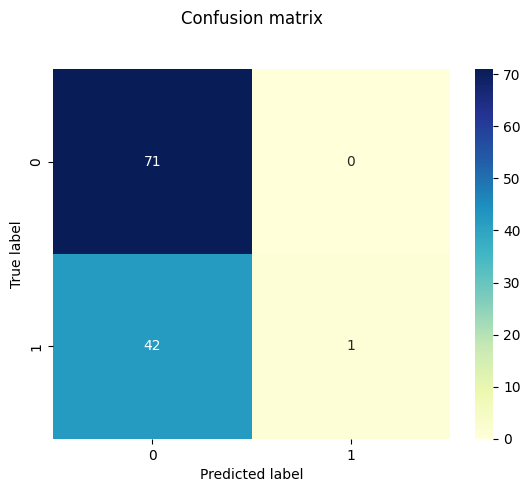

In [ ]:
#Macierz pomylek dla tego modelu
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
acc_train_curve = model_history.history['accuracy']
acc_val_curve = model_history.history['val_accuracy']
loss_train_curve = model_history.history['loss']
loss_val_curve = model_history.history['val_loss']
print(acc_train_curve)
print(acc_val_curve)
print(loss_train_curve)
print(loss_val_curve)

[0.46454766392707825, 0.5843520760536194, 0.621026873588562, 0.621026873588562, 0.621026873588562, 0.621026873588562, 0.621026873588562, 0.621026873588562, 0.621026873588562, 0.621026873588562, 0.621026873588562, 0.621026873588562, 0.621026873588562, 0.621026873588562, 0.621026873588562, 0.621026873588562, 0.621026873588562, 0.621026873588562, 0.621026873588562, 0.621026873588562, 0.621026873588562, 0.621026873588562, 0.621026873588562, 0.621026873588562, 0.621026873588562, 0.621026873588562, 0.621026873588562, 0.621026873588562, 0.621026873588562, 0.621026873588562]
[0.30434781312942505, 0.695652186870575, 0.695652186870575, 0.695652186870575, 0.695652186870575, 0.695652186870575, 0.695652186870575, 0.695652186870575, 0.695652186870575, 0.695652186870575, 0.695652186870575, 0.695652186870575, 0.695652186870575, 0.695652186870575, 0.695652186870575, 0.695652186870575, 0.695652186870575, 0.695652186870575, 0.695652186870575, 0.695652186870575, 0.695652186870575, 0.695652186870575, 0.695

Text(0, 0.5, 'Loss')

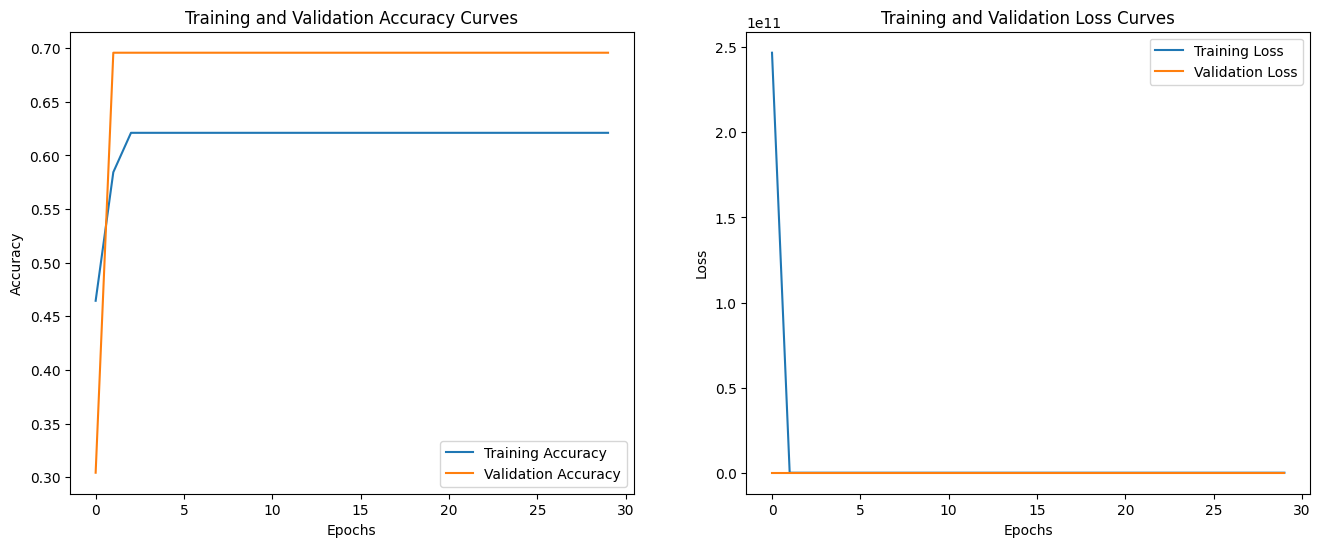

In [ ]:
#Wykresy sprawdzajace czy model smiga
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
acc_train_curve = model_history.history['accuracy']
acc_val_curve = model_history.history['val_accuracy']
plt.plot(acc_train_curve, label='Training Accuracy')
plt.plot(acc_val_curve, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.text(0.5, -0.15, '(a)', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)

plt.subplot(1, 2, 2)
loss_train_curve = model_history.history['loss']
loss_val_curve = model_history.history['val_loss']
plt.plot(loss_train_curve, label='Training Loss')
plt.plot(loss_val_curve, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.text(0.5, -0.15, '(a)', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)

In [ ]:
#Zad2
fashion = keras.datasets.fashion_mnist

In [ ]:
(trainX, trainy), (testX, testy) = fashion.load_data()

NameError: name 'fashion' is not defined

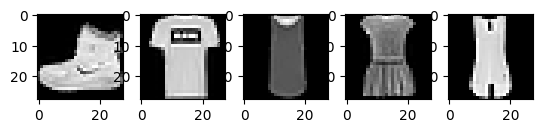

In [ ]:
#Wyswietlanie prykladowych zdjec ze zbioru treningowego
for i in range(0, 5):
  plt.subplot(1, 5, i+1)
  plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
#Przeksztalcenie danych
trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], trainX.shape[2], 1))
testX = testX.reshape((testX.shape[0], testX.shape[1], testX.shape[2], 1))

In [ ]:
#Sprawdzenie rozmiaru po przeksztalceniu
print(trainX.shape)
print(testX.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
#Normalizacja wartosci pikseli
trainX = trainX/255
testX = testX/255

In [ ]:
#Zdefiniowanie modelu
model = keras.models.Sequential()

In [ ]:
#Reszta warstw
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Podsumowanie modelu
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │         540,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,626,692 (6.21 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,084,462 (4.14 MB)

In [ ]:
#Skompilowanie modelu
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Trenowanie
model_history = model.fit(trainX, trainy, epochs=10, validation_split=0.1, batch_size=32)

NameError: name 'model' is not defined

In [ ]:
#Ewaluacja modelu
loss, accuracy = model.evaluate(testX, testy)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9068 - loss: 0.4189
Test Loss: 0.39944538474082947
Test Accuracy: 0.910099983215332


In [ ]:
acc_train_curve = model_history.history['accuracy']
acc_val_curve = model_history.history['val_accuracy']
loss_train_curve = model_history.history['loss']
loss_val_curve = model_history.history['val_loss']
print(acc_train_curve)
print(acc_val_curve)
print(loss_train_curve)
print(loss_val_curve)

[0.9398333430290222, 0.9488703608512878, 0.9558703899383545, 0.9633703827857971, 0.9681851863861084, 0.9724259376525879, 0.9763148427009583, 0.9787222146987915, 0.9829815030097961, 0.9847962856292725]
[0.9330000281333923, 0.9391666650772095, 0.9334999918937683, 0.9323333501815796, 0.9326666593551636, 0.9256666898727417, 0.9303333163261414, 0.9326666593551636, 0.9304999709129333, 0.9296666383743286]
[0.1631661355495453, 0.13840696215629578, 0.11944187432527542, 0.1022752970457077, 0.08734402060508728, 0.07664944231510162, 0.06469795107841492, 0.05681518465280533, 0.0490892119705677, 0.042236462235450745]
[0.17470048367977142, 0.16977430880069733, 0.18007442355155945, 0.1860075145959854, 0.20422008633613586, 0.22288885712623596, 0.20934617519378662, 0.22961129248142242, 0.24898496270179749, 0.24967360496520996]


Text(0, 0.5, 'Loss')

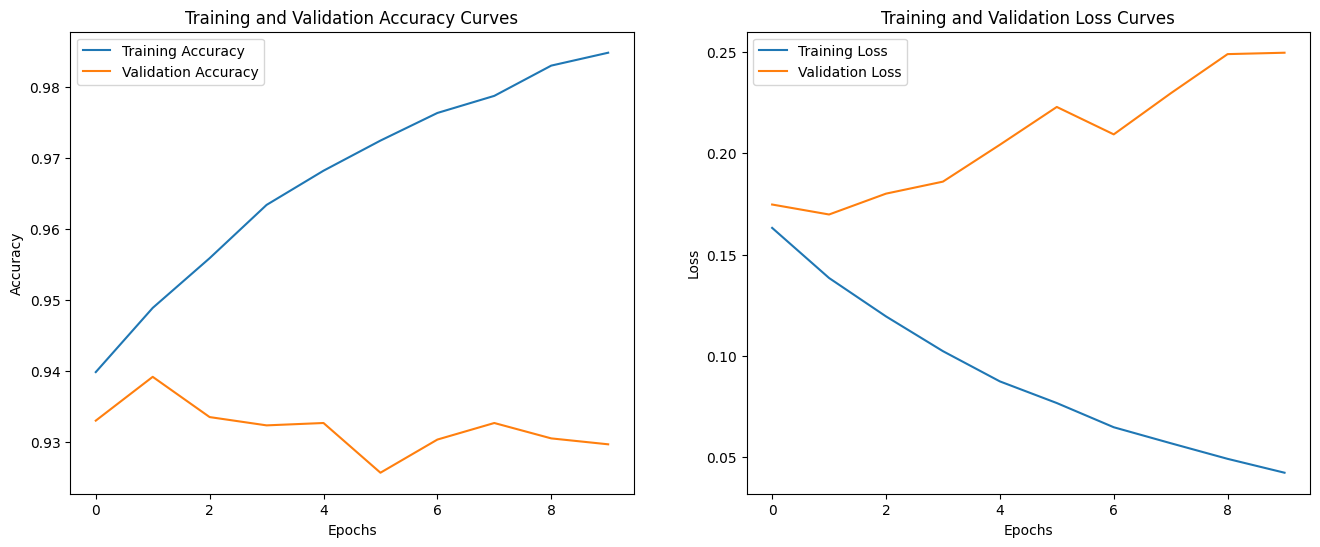

In [ ]:
#Wykresy sprawdzajace czy model smiga
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
acc_train_curve = model_history.history['accuracy']
acc_val_curve = model_history.history['val_accuracy']
plt.plot(acc_train_curve, label='Training Accuracy')
plt.plot(acc_val_curve, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
loss_train_curve = model_history.history['loss']
loss_val_curve = model_history.history['val_loss']
plt.plot(loss_train_curve, label='Training Loss')
plt.plot(loss_val_curve, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
#Zadanie 3
#To cos od Lukasza mam
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
#Stworzenie potrzebnych zmiennych
LABELS_FILE = 'coco.names'
CONFIG_FILE = 'yolov3.cfg'
WEIGHTS_FILE = 'yolov3.weights'
CONFIDENCE_THRESHOLD = 0.3

--2025-03-24 15:10:42--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  12.3MB/s    in 25s     

2025-03-24 15:11:07 (9.63 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]

--2025-03-24 15:11:07--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg.1’

yolov3.cfg.1        100%[===================>]   8.15K  --.-KB/s    in 0s   

In [ ]:
#Stworzenie potrzebnych zmiennych
LABELS = open(LABELS_FILE).read().strip().split("\n")
np.random.seed(4)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")
net = cv2.dnn.readNetFromDarknet(CONFIG_FILE, WEIGHTS_FILE)

In [ ]:
def drawBoxes(image, layerOutputs, H, W):
  boxes = []
  confidences = []
  classIDs = []
  for output in layerOutputs:
    for detection in output:
      scores = detection[5:]
      classID = np.argmax(scores)
      confidence = scores[classID]
      if confidence > CONFIDENCE_THRESHOLD:
        box = detection[0:4] * np.array([W, H, W, H])
        (centerX, centerY, width, height) = box.astype("int")
        x = int(centerX - (width / 2))
        y = int(centerY - (height / 2))
        boxes.append([x, y, int(width), int(height)])
        confidences.append(float(confidence))
        classIDs.append(classID)
  idxs = cv2.dnn.NMSBoxes(boxes, confidences, CONFIDENCE_THRESHOLD, CONFIDENCE_THRESHOLD)
  #Jezeli wykryto to narysowac pudlo z podpisem i pewnoscia
  if len(idxs) > 0:
    for i in idxs.flatten():
      (x, y) = (boxes[i][0], boxes[i][1])
      (w, h) = (boxes[i][2], boxes[i][3])
      color = [int(c) for c in COLORS[classIDs[i]]]
      cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
      text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
      cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
  cv2_imshow(image)

In [ ]:
def detectObjects(imagePath):
  image = cv2.imread(imagePath)
  (H, W) = image.shape[:2]
  ln = net.getLayerNames()
  ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]

  blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
  net.setInput(blob)
  layerOutputs = net.forward(ln)
  drawBoxes(image, layerOutputs, H, W)

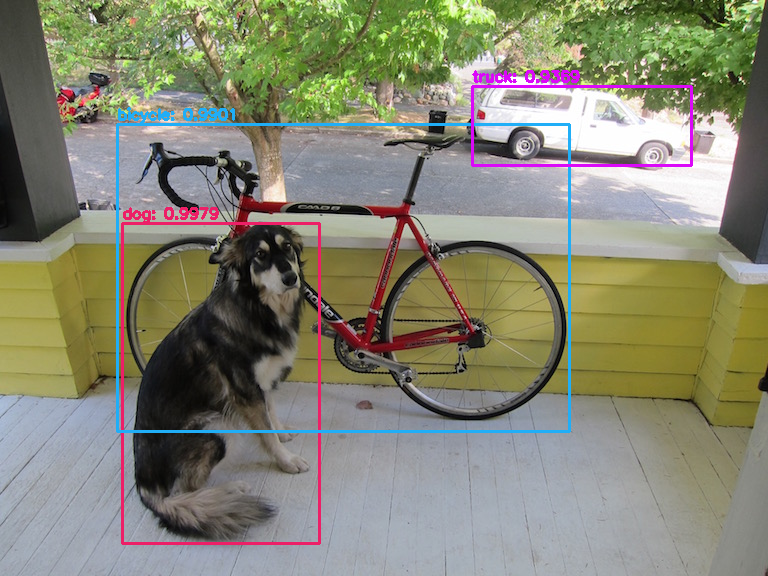

In [ ]:
#Wywolanie funkcji wykrywania obiektow na zdjeciu z psami
detectObjects("dog.jpg")

In [ ]:
#Zad4
#Ustawienie seed by byla powtarzalnosc
tf.random.set_seed(7)

In [ ]:
#Zaladowanie danych, ale tylko jedna kolumna
milk = pd.read_csv("milk.csv", usecols=[1], engine="python")
milk.head()

,Production
0,589
1,561
2,640
3,656
4,727


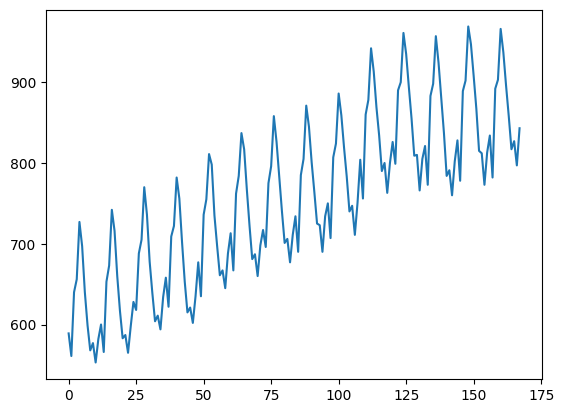

In [ ]:
#Wyciągnięcie danych i wyświetlenie ich na wykresie
milk_data = milk.values
milk_data = milk_data.astype("float32")

plt.plot(milk_data)

In [ ]:
#Normalizacja danych
scaler = MinMaxScaler(feature_range=(0, 1))
milk_data = scaler.fit_transform(milk_data)

In [ ]:
#Podział na zbiór treningowy i testowy
train_size = int(len(milk_data) * 0.67)
test_size = len(milk_data) - train_size
train, test = milk_data[0:train_size, :], milk_data[train_size:len(milk_data), :]
print(len(train), len(test))

112 56


In [ ]:
#Zdefiniowanie metody, która zmienia tablicę wartści na macierz zbioru danych
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset) - look_back - 1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
#Zamiana X=t i Y=t+1
look_back=1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
#Zmiana wejścia na [próbki, kroki czasowe, cechy]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
#Stworzenie i trening LSTM
model = keras.models.Sequential()
model.add(keras.layers.LSTM(4, input_shape=(1, look_back)))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
110/110 - 2s - 21ms/step - loss: 0.1357
Epoch 2/100
110/110 - 0s - 3ms/step - loss: 0.0721
Epoch 3/100
110/110 - 0s - 3ms/step - loss: 0.0373
Epoch 4/100
110/110 - 0s - 2ms/step - loss: 0.0289
Epoch 5/100
110/110 - 0s - 3ms/step - loss: 0.0269
Epoch 6/100
110/110 - 0s - 3ms/step - loss: 0.0254
Epoch 7/100
110/110 - 0s - 3ms/step - loss: 0.0240
Epoch 8/100
110/110 - 0s - 3ms/step - loss: 0.0226
Epoch 9/100
110/110 - 0s - 3ms/step - loss: 0.0213
Epoch 10/100
110/110 - 0s - 3ms/step - loss: 0.0199
Epoch 11/100
110/110 - 0s - 3ms/step - loss: 0.0187
Epoch 12/100
110/110 - 0s - 3ms/step - loss: 0.0174
Epoch 13/100
110/110 - 0s - 4ms/step - loss: 0.0163
Epoch 14/100
110/110 - 1s - 6ms/step - loss: 0.0153
Epoch 15/100
110/110 - 0s - 4ms/step - loss: 0.0144
Epoch 16/100
110/110 - 1s - 6ms/step - loss: 0.0137
Epoch 17/100
110/110 - 0s - 4ms/step - loss: 0.0130
Epoch 18/100
110/110 - 0s - 2ms/step - loss: 0.0125
Epoch 19/100
110/110 - 0s - 3ms/step - loss: 0.0121
Epoch 20/100
110/110

In [ ]:
#Tworzenie przewidywań
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

#Obliczanie pierwiastka średniokwadratowego błędu
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Train Score: 43.03 RMSE
Test Score: 48.68 RMSE


In [ ]:
#Wykonanie odpowiednich operacji na zbiorach treningowym i testowym przewidywań w celu pokazania ich na wykresie
trainPredictPlot = np.empty_like(milk_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

testPredictPlot = np.empty_like(milk_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(milk_data) - 1, :] = testPredict

#Narysowanie początkowego wykresu i wykresu przewidywań
plt.plot(scaler.inverse_transform(milk_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

NameError: name 'np' is not defined